# Predict House Sale Prices

Work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. Can read more about why the data was collected here ([link](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)). You can also read about the different columns in the data here ([link](https://s3.amazonaws.com/dq-content/307/data_description.txt)).

In [1]:
import pandas as pd
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# read data from file
houses = pd.read_csv("AmesHousing.tsv", delimiter='\t')
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Set up a Pipeline of Functions

In [2]:
##
## Function for cleaning and transforming features
##
def transform_features(df):
    return df

##
## Function for selecting features
##
def select_features(df):
    cols = ['Gr Liv Area', 'SalePrice']
    df = df[cols]
    return df

##
## Function for training and test model
##
def train_and_test(df):
    
    # split data into train and test datasets
    train = df[:1460].copy()
    test = df[1460:].copy()
    
    # name of target column
    target = 'SalePrice'
    
    # select names of numerical columns
    features = train.select_dtypes(include=['int', 'float']).columns
    # drop name of tafget column
    features = features.drop(target)
    
    # fit the model:
    model = LinearRegression().fit(train[features], train[target])
    test_predictions = model.predict(test[features])
    mse = mean_squared_error(test[target], test_predictions)
    rmse = np.sqrt(mse)
    
    return rmse

clean_data = transform_features(houses)
selected_data = select_features(clean_data)
rmse = train_and_test(selected_data)
rmse

57088.25161263909

##  Feature Engineering

Update `transform_features()` so that the goal of this function is to:

* remove features that we don't want to use in the model, just based on the number of missing values or data leakage
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc)
* create new features by combining other features

### Drop all columns with number of missing values more then 5%

In [3]:
df = houses.copy()
is_null_cols = df.isnull().sum()
missing_value_cols = is_null_cols[is_null_cols !=0]
missing_value_cols

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [4]:
# calculate number od missing valuea as criteria to drop columns
threshold = .05 # 5% of missing values

# number of rows
num_rows = df.shape[0]
# criteria to drop column
criteria = round(num_rows * threshold)
criteria

146

In [5]:
# drop columns with more than threshold of missing values (by criteria)
df = df.drop(columns=missing_value_cols[missing_value_cols > criteria].index)
is_null_cols = df.isnull().sum()
missing_value_cols = is_null_cols[is_null_cols !=0]
missing_value_cols

Mas Vnr Type      23
Mas Vnr Area      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin SF 1       1
BsmtFin Type 2    81
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Electrical         1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

### Drop text columns with more than 1 missing value

In [6]:
# get columns with text values AND missing values
text_columns = df[missing_value_cols.index].select_dtypes(include=['object']).columns
text_columns

Index(['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical'],
      dtype='object')

In [7]:
# number of missing values
text_missing_cols = df[text_columns].isnull().sum()
text_missing_cols

Mas Vnr Type      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin Type 2    81
Electrical         1
dtype: int64

In [8]:
# drop columns with missing values more than 1:
df = df.drop(columns=text_missing_cols[text_missing_cols > 0].index)
is_null_cols = df.isnull().sum()
missing_value_cols = is_null_cols[is_null_cols !=0]
missing_value_cols

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

### Fill in the missing values for numerical columns with mean values



In [9]:
# get dataset with missing values AND numerical columns
numerical_columns = df[missing_value_cols.index].select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
       'Garage Area'],
      dtype='object')

In [10]:
# fill with mean values
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
is_null_cols = df.isnull().sum()
missing_value_cols = is_null_cols[is_null_cols !=0]
missing_value_cols

Series([], dtype: int64)

### Create new features

In [11]:
# create number of years until remodeling: 
df['Years Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']
# create column with age of the houses
df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']

# check for negative results in age
negative_years = df.index[(df['Years Since Remod'] < 0) | (df['Years Before Sale'] < 0)]
negative_years

Int64Index([1702, 2180, 2181], dtype='int64')

In [12]:
# drop rows
df = df.drop(negative_years)

# drop columns 'Year Remod/Add and Year Built
df = df.drop(columns=['Year Remod/Add','Year Built'])

### Drop more columns

In [13]:
# drop columns that are not useful for ML
df = df.drop(columns=['Order', 'PID'])

# drop columns that leak info about the final sale
df = df.drop(columns=['Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold'])

### Update function transform_features()

In [14]:
##
## Function for cleaning and transforming features
##
def transform_features(df):
    
    ## Drop all columns with number of missing values more then 5%
    is_null_cols = df.isnull().sum()
    missing_value_cols = is_null_cols[is_null_cols !=0]
    criteria = round(num_rows * .05)
    cols_to_drop = missing_value_cols[missing_value_cols > criteria].index
    df = df.drop(columns=cols_to_drop)
    missing_value_cols = missing_value_cols.drop(cols_to_drop)
  
    ## Drop text columns with more than 1 missing value
    text_columns = df[missing_value_cols.index].select_dtypes(include=['object']).columns
    text_missing_cols = df[text_columns].isnull().sum()
    cols_to_drop = text_missing_cols[text_missing_cols > 0].index
    df = df.drop(columns=cols_to_drop)
    missing_value_cols = missing_value_cols.drop(cols_to_drop)
    
    ## Fill in the missing values for numerical columns with mean values
    numerical_missing_cols = df[missing_value_cols.index].select_dtypes(include=['int', 'float']).columns
    df[numerical_missing_cols] = df[numerical_missing_cols].fillna(df[numerical_missing_cols].mean())
    
    ## Create new features
    df['Years Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    #negative_years = df.index[(df['Years Since Remod'] < 0) | (df['Years Before Sale'] < 0)]
    df = df.drop(negative_years)
    
    ## Drop columns that are not useful for ML
    df = df.drop(columns=['Order', 'PID'])

    ## Drop columns that leak info about the final sale
    df = df.drop(columns=['Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold', 'Year Remod/Add','Year Built'])
    
    return df

##
## Function for selecting features
##
def select_features(df):
    cols = ['Gr Liv Area', 'SalePrice']
    df = df[cols]
    return df

##
## Function for training and test model
##
def train_and_test(df):
    
    # split data into train and test datasets
    train = df[:1460].copy()
    test = df[1460:].copy()
    
    # name of target column
    target = 'SalePrice'
    
    # select names of numerical columns
    features = train.select_dtypes(include=['int', 'float']).columns
    # drop name of tafget column
    features = features.drop(target)
    
    # fit the model:
    model = LinearRegression().fit(train[features], train[target])
    test_predictions = model.predict(test[features])
    mse = mean_squared_error(test[target], test_predictions)
    rmse = np.sqrt(mse)
    
    return rmse

clean_data = transform_features(houses)
selected_data = select_features(clean_data)
rmse = train_and_test(selected_data)
rmse

55275.36731241307

## Feature Selection

### Select columns strong correlated to target

In [15]:
# Generate a correlation heatmap matrix of the numerical features in the training data set.
# select numerical features
df = clean_data.copy()
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
numerical_cols

# correlation map
corr_map = df[numerical_cols].corr()
corr_to_price = corr_map['SalePrice'].abs().sort_values()
corr_to_price = corr_to_price.drop('SalePrice')
corr_to_price

BsmtFin SF 2         0.006000
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035874
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182248
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276329
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.438928
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.510611
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641675
Total Bsmt SF        0.643601
Garage Cars          0.648411
Gr Liv Area          0.717596
Overall Qual         0.801206
Name: SalePrice, dtype: float64

In [16]:
# select features with correlation more than 0.4
corr_thre = .4
corr_to_price = corr_to_price[corr_to_price > corr_thre]
corr_to_price

BsmtFin SF 1         0.438928
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.510611
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641675
Total Bsmt SF        0.643601
Garage Cars          0.648411
Gr Liv Area          0.717596
Overall Qual         0.801206
Name: SalePrice, dtype: float64

In [17]:
# drop columns with feature correlation to price less than 0.4
df = df.drop(columns=corr_to_price[corr_to_price < corr_thre].index)

### Drop columns strongly correlated to each other

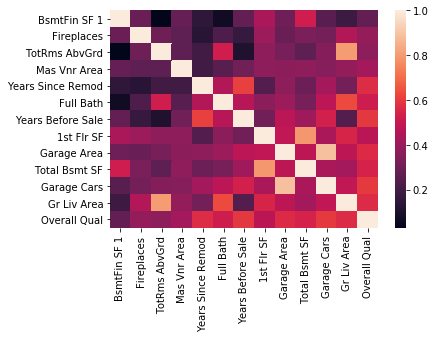

In [18]:
# create heatmap to find if any eatures correlated strongly with each other
corrmap_2 = df[corr_to_price.index].corr()
corrmap_2 = corrmap_2.abs()
sns.heatmap(corrmap_2)

In [19]:
# drop 'Garage Cars', 'TotRms AbvGrd', '1st Flr SF' as most correlated to each other
df = df.drop(columns=['Garage Cars', 'TotRms AbvGrd', '1st Flr SF'])

### Convert text columns to categorical

In [20]:
text_cols = df.select_dtypes(include=['object']).columns
text_cols

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive'],
      dtype='object')

In [21]:
col_values = df[text_cols].describe().T
col_values

,count,unique,top,freq
MS Zoning,2927,7,RL,2270
Street,2927,2,Pave,2915
Lot Shape,2927,4,Reg,1859
Land Contour,2927,4,Lvl,2632
Utilities,2927,3,AllPub,2924
Lot Config,2927,5,Inside,2138
Land Slope,2927,3,Gtl,2786
Neighborhood,2927,28,NAmes,443
Condition 1,2927,9,Norm,2520
Condition 2,2927,8,Norm,2898


In [22]:
# low variance columns:
variance_thre = .95
low_var_col = col_values[(col_values['freq']/col_values['count']) > variance_thre].index
low_var_col

Index(['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl',
       'Heating'],
      dtype='object')

In [23]:
# drop columns with low variance
df = df.drop(columns=low_var_col)
col_values = col_values.drop(low_var_col)

In [24]:
# drop columns with more than 10 unique values
high_unique_cols = col_values[col_values['unique'] > 10].index
df = df.drop(columns=high_unique_cols)

In [25]:
# select list of cols to make categorical
text_to_cat_cols = df.select_dtypes(include=['object']).columns
text_to_cat_cols

Index(['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Condition 1',
       'Bldg Type', 'House Style', 'Roof Style', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating QC', 'Central Air', 'Kitchen Qual', 'Functional',
       'Paved Drive'],
      dtype='object')

In [26]:
# create catergories and add dummy columns to dataset, and delete original columns
for col in text_to_cat_cols:
    df[col] = df[col].astype('category')
    col_dummies = pd.get_dummies(df[col])
    df = pd.concat([df, col_dummies], axis=1)
    del df[col]

### Convert numerical columns to categorical

In [27]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
numerical_cols

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice',
       'Years Since Remod', 'Years Before Sale'],
      dtype='object')

In [28]:
# list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", 
                    "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", 
                    "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

# select numerical columns from nominal_features list:
categorical_cols = []
for col in numerical_cols:
    if col in nominal_features:
        categorical_cols.append(col)
categorical_cols    

['MS SubClass']

In [29]:
# create catergories and add dummy columns to dataset, and delete original columns
for col in categorical_cols:
    df[col] = df[col].astype('category')
    col_dummies = pd.get_dummies(df[col])
    df = pd.concat([df, col_dummies], axis=1)
    del df[col]

### Update function select_features()

In [30]:
##
## Function for cleaning and transforming features
##
def transform_features(df):
    
    ## Drop all columns with number of missing values more then 5%
    is_null_cols = df.isnull().sum()
    missing_value_cols = is_null_cols[is_null_cols !=0]
    criteria = round(num_rows * .05)
    cols_to_drop = missing_value_cols[missing_value_cols > criteria].index
    df = df.drop(columns=cols_to_drop)
    missing_value_cols = missing_value_cols.drop(cols_to_drop)
  
    ## Drop text columns with more than 1 missing value
    text_columns = df[missing_value_cols.index].select_dtypes(include=['object']).columns
    text_missing_cols = df[text_columns].isnull().sum()
    cols_to_drop = text_missing_cols[text_missing_cols > 0].index
    df = df.drop(columns=cols_to_drop)
    missing_value_cols = missing_value_cols.drop(cols_to_drop)
    
    ## Fill in the missing values for numerical columns with mean values
    numerical_missing_cols = df[missing_value_cols.index].select_dtypes(include=['int', 'float']).columns
    df[numerical_missing_cols] = df[numerical_missing_cols].fillna(df[numerical_missing_cols].mean())
    
    ## Create new features
    df['Years Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    #negative_years = df.index[(df['Years Since Remod'] < 0) | (df['Years Before Sale'] < 0)]
    df = df.drop(negative_years)
    
    ## Drop columns that are not useful for ML
    df = df.drop(columns=['Order', 'PID'])

    ## Drop columns that leak info about the final sale
    df = df.drop(columns=['Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold', 'Year Remod/Add','Year Built'])
    
    return df

##
## Function for selecting features
##
def select_features(df):
    
    ## Select columns strong correlated to target
    numerical_cols = df.select_dtypes(include=['int', 'float']).columns
    # correlation map
    corr_map = df[numerical_cols].corr()
    corr_to_price = corr_map['SalePrice'].abs().sort_values()
    corr_to_price = corr_to_price.drop('SalePrice')    
    # drop columns with feature correlation to price less than 0.4
    corr_thre = .4
    df = df.drop(columns=corr_to_price[corr_to_price < corr_thre].index)
    
    ## Drop columns strongly correlated to each other
    # drop 'Garage Cars', 'TotRms AbvGrd', '1st Flr SF' as most correlated to each other
    df = df.drop(columns=['Garage Cars', 'TotRms AbvGrd', '1st Flr SF'])
    
    ## Convert text columns to categorical
    text_cols = df.select_dtypes(include=['object']).columns
    text_to_cat_cols = df[text_cols].describe().T
    # drop columns with low variance:
    variance_thre = .95
    low_var_col = text_to_cat_cols[(text_to_cat_cols['freq']/text_to_cat_cols['count']) > variance_thre].index
    df = df.drop(columns=low_var_col)
    text_to_cat_cols = text_to_cat_cols.drop(low_var_col)
    # drop columns with more than 10 unique values
    high_unique_cols = text_to_cat_cols[text_to_cat_cols['unique'] > 10].index
    df = df.drop(columns=high_unique_cols)
    text_to_cat_cols = text_to_cat_cols.drop(high_unique_cols)
    # create catergories and add dummy columns to dataset, and delete original columns
    for col in text_to_cat_cols.index:
        df[col] = df[col].astype('category')
        col_dummies = pd.get_dummies(df[col])
        df = pd.concat([df, col_dummies], axis=1)
        del df[col]
        
    ## Convert numerical columns to categorical
    numerical_cols = df.select_dtypes(include=['int', 'float']).columns
    # list of column names from documentation that are *meant* to be categorical
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", 
                    "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", 
                    "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", 
                    "Central Air", "Garage Type", "Misc Feature", "Sale Type", "Sale Condition"]
    # select numerical columns from nominal_features list:
    categorical_cols = []
    for col in numerical_cols:
        if col in nominal_features:
            categorical_cols.append(col)  
    # create catergories and add dummy columns to dataset, and delete original columns
    for col in categorical_cols:
        df[col] = df[col].astype('category')
        col_dummies = pd.get_dummies(df[col])
        df = pd.concat([df, col_dummies], axis=1)
        del df[col]
    
    return df

##
## Function for training and test model
##
def train_and_test(df):
    
    # split data into train and test datasets
    train = df[:1460].copy()
    test = df[1460:].copy()
    
    # name of target column
    target = 'SalePrice'
    
    # select names of numerical columns
    features = train.select_dtypes(include=['int', 'float']).columns
    # drop name of target column
    features = features.drop(target)
    
    # fit the model:
    model = LinearRegression().fit(train[features], train[target])
    test_predictions = model.predict(test[features])
    mse = mean_squared_error(test[target], test_predictions)
    rmse = np.sqrt(mse)
    
    return rmse

clean_data = transform_features(houses)
selected_data = select_features(clean_data)
rmse = train_and_test(selected_data)
rmse

36755.76656153378

In [31]:
selected_data.columns

Index(['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Garage Area', 'SalePrice',
       'Years Since Remod', 'Years Before Sale', 'A (agr)', 'C (all)', 'FV',
       'I (all)', 'RH', 'RL', 'RM', 'IR1', 'IR2', 'IR3', 'Reg', 'Bnk', 'HLS',
       'Low', 'Lvl', 'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside', 'Artery',
       'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn', '1Fam',
       '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE', '1.5Fin', '1.5Unf', '1Story',
       '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl', 'Flat', 'Gable',
       'Gambrel', 'Hip', 'Mansard', 'Shed', 'Ex', 'Fa', 'Gd', 'TA', 'Ex', 'Fa',
       'Gd', 'Po', 'TA', 'BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood',
       'Ex', 'Fa', 'Gd', 'Po', 'TA', 'N', 'Y', 'Ex', 'Fa', 'Gd', 'Po', 'TA',
       'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sal', 'Sev', 'Typ', 'N', 'P',
       'Y'],
      dtype='object')

## Train And Test

Update final part of the pipeline, training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named k that controls the type of cross validation that occurs.

### Update function train_and_test()¶

In [32]:
##
## Function for cleaning and transforming features
##
def transform_features(df):
    
    ## Drop all columns with number of missing values more then 5%
    is_null_cols = df.isnull().sum()
    missing_value_cols = is_null_cols[is_null_cols !=0]
    criteria = round(num_rows * .05)
    cols_to_drop = missing_value_cols[missing_value_cols > criteria].index
    df = df.drop(columns=cols_to_drop)
    missing_value_cols = missing_value_cols.drop(cols_to_drop)
  
    ## Drop text columns with more than 1 missing value
    text_columns = df[missing_value_cols.index].select_dtypes(include=['object']).columns
    text_missing_cols = df[text_columns].isnull().sum()
    cols_to_drop = text_missing_cols[text_missing_cols > 0].index
    df = df.drop(columns=cols_to_drop)
    missing_value_cols = missing_value_cols.drop(cols_to_drop)
    
    ## Fill in the missing values for numerical columns with mean values
    numerical_missing_cols = df[missing_value_cols.index].select_dtypes(include=['int', 'float']).columns
    df[numerical_missing_cols] = df[numerical_missing_cols].fillna(df[numerical_missing_cols].mean())
    
    ## Create new features
    df['Years Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = df['Yr Sold'] - df['Year Built']
    #negative_years = df.index[(df['Years Since Remod'] < 0) | (df['Years Before Sale'] < 0)]
    df = df.drop(negative_years)
    
    ## Drop columns that are not useful for ML
    df = df.drop(columns=['Order', 'PID'])

    ## Drop columns that leak info about the final sale
    df = df.drop(columns=['Mo Sold', 'Sale Condition', 'Sale Type', 'Yr Sold', 'Year Remod/Add','Year Built'])
    
    return df

##
## Function for selecting features
##
def select_features(df):
    
    ## Select columns strong correlated to target
    numerical_cols = df.select_dtypes(include=['int', 'float']).columns
    # correlation map
    corr_map = df[numerical_cols].corr()
    corr_to_price = corr_map['SalePrice'].abs().sort_values()
    #corr_to_price = corr_to_price.drop('SalePrice')    
    # drop columns with feature correlation to price less than 0.4
    corr_thre = .4
    df = df.drop(columns=corr_to_price[corr_to_price < corr_thre].index)
    
    ## Drop columns strongly correlated to each other
    # drop 'Garage Cars', 'TotRms AbvGrd', '1st Flr SF' as most correlated to each other
    df = df.drop(columns=['Garage Cars', 'TotRms AbvGrd', '1st Flr SF'])
    
    ## Convert text columns to categorical
    text_cols = df.select_dtypes(include=['object']).columns
    text_to_cat_cols = df[text_cols].describe().T
    # drop columns with low variance:
    variance_thre = .95
    low_var_col = text_to_cat_cols[(text_to_cat_cols['freq']/text_to_cat_cols['count']) > variance_thre].index
    df = df.drop(columns=low_var_col)
    text_to_cat_cols = text_to_cat_cols.drop(low_var_col)
    # drop columns with more than 10 unique values
    high_unique_cols = text_to_cat_cols[text_to_cat_cols['unique'] > 10].index
    df = df.drop(columns=high_unique_cols)
    text_to_cat_cols = text_to_cat_cols.drop(high_unique_cols)
    # create catergories and add dummy columns to dataset, and delete original columns
    for col in text_to_cat_cols.index:
        df[col] = df[col].astype('category')
        df = pd.get_dummies(df, prefix=col, columns=[col])
        
    ## Convert numerical columns to categorical
    numerical_cols = df.select_dtypes(include=['int', 'float']).columns
    # list of column names from documentation that are *meant* to be categorical
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", 
                    "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", 
                    "Roof Matl", "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", 
                    "Central Air", "Garage Type", "Misc Feature", "Sale Type", "Sale Condition"]
    # select numerical columns from nominal_features list:
    categorical_cols = []
    for col in numerical_cols:
        if col in nominal_features:
            categorical_cols.append(col)  
    # create catergories and add dummy columns to dataset, and delete original columns
    for col in categorical_cols:
        df[col] = df[col].astype('category')
        df = pd.get_dummies(df, prefix=col, columns=[col])
    
    return df

##
## Function for training and test model
##
def train_and_test(df, k=0):
    target = 'SalePrice'
    features = df.columns.drop(target)
    model = LinearRegression()
    
    ## When k equals 0, perform holdout validation
    if k==0:
        train = df[:1460].copy()
        test = df[1460:].copy()

        model.fit(train[features], train[target])
        predictions = model.predict(test[features])
        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)
        return rmse
    
    ## When k equals 1, perform simple cross validation
    if k==1:
        np.random.seed(1)
        shuffled_index = np.random.permutation(numeric_df.index)
        rand_df = df.reindex(shuffled_index)
        
        fold_one = rand_df[:1460].copy()
        fold_two = rand_df[1460:].copy()
        
        model.fit(fold_one[features], fold_one[target])
        predictions_one = model.predict(fold_two[features])
        mse_one = mean_squared_error(fold_two[target], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        model.fit(fold_two[features], fold_two[target])
        predictions_two = model.predict(fold_one[features])
        mse_two = mean_squared_error(fold_one[target], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        print(rmse_one)
        print(rmse_two)
        
        return np.average([rmse_one,rmse_two])
    else:
        kf = KFold(k, shuffle=True, random_state=1)
    
        rmse_values = []        
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            
            model.fit(train[features], train[target])
            predictions = model.predict(test[features])
            mse = mean_squared_error(test[target], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse
    
clean_data = transform_features(houses)
selected_data = select_features(clean_data)
rmse = train_and_test(selected_data, 4)
rmse

[36946.47490327736, 24615.34342087074, 25390.749975785275, 28876.344410488437]


28957.228177605455